### DS 220 Final Project: Indian Food Nutrition (Tianna Samal, Daman McBride)

### Problem Space: 
Indians, both native and immigrant, are affected disproportionately by lifestyle diseases (cardiovascular conditions, Type 2 diabetes, metabolic disorders, etc.) amongst the urban population, as well as widespread malnutrition and deficiency of energy amongst rural populations. 
Cardiovascular diseases account for 25.8% of deaths for Asian-Indian immigrants and 27% of urban deaths in India. Heart disease occurs in Asian Indians 5-10 years earlier than other ethnicities. Asian-Indian immigrants have higher rates of diabetes, metabolic syndrome, and CVD compared to the general US population and other immigrant groups. 
Studying and analyzing the impact of a traditional Indian diet can be used to build recommendation engines, health scoring systems, or classification models for meal planning in order to help out proactive individuals and health institutions across the country. It also adds to the knowledge of comparative studies across other regions' cuisines. 
<br>

**Questions to address and why:** <br>
- What are the most/least calorie dense foods (most calories per 100g)? <br>
This statistic is important for people needing to be in a calorie deficit, maintenance, or surplus. This information can be used to provide individuals or patients with recommendations for avoiding long term problems with heart disease or diabetes. 
- What is the macronutrient distribution of a food? <br>
Data important for people needing more protein, carbs, fats, or other major nutritional elements in their diet. These results will give people with Asian-Indian diets more awareness of the options they have to reach proper nutritional goals.
- What is the micronutrient distribution of a food? <br>
important for people needing to increase intake of nutrients such as calcium or iron. These are often lacking amongst Asian-Indian people groups despite importance to overall well being such as growth, disease prevention, blood flow, and bone strength. These results can again provide dietary recommendations/suggestions.
- Is there a correlation between high fat and high calorie foods? <br>
The visual of this correlation can help clear up misconceptions regarding high calorie = fat and weight gain (which are generally seen as negative). It also will demonstrate options across the scale for those that may want to increase awareness of dishes that best fit their dietary needs. 
- What dishes meet recommended daily values in a specific category? (recommended nutritional goals listed below): <br>
Rec protein value: 10-35% of caloric intake
Rec carbs value: 130g
Rec fats: 20-35% of caloric intake
Rec sugar: <10% of caloric intake or 25g
Rec fibre: 25-30g
Rec sodium: 5g
Rec calcium: 600mg 
Rec iron: 8-27mg
- What are some complete statistics of all the nutrient values in a food? (mean, median, std dev, etc) <br>
These statistics give some general understandings of overall cultural implications of the Asian-Indian diet. This can lead to conclusions on where it falls short nutritionally and what is effective already. As a result, individuals can determine how to alter or improve the parts of their diets that fall short.
- Which nutrients are strongly correlated with calorie content in Indian dishes? <br>
The idea is that with an understanding of the Asian-Indian diet, we can highlight the areas most in need of improvement based on World Health Organization recommendations. A heat map will be an effective representation of the different nutritional areas successes and shortcomings.

Part 1: Import libraries

In [24]:
import pandas as pd
import warnings
import math
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
import numpy as np

Load dataset

In [3]:
nutr_data= pd.read_csv("Indian_Food_Nutrition_Processed.csv")

nutr_data.head()

,Dish Name,Calories (kcal),Carbohydrates (g),Protein (g),Fats (g),Free Sugar (g),Fibre (g),Sodium (mg),Calcium (mg),Iron (mg),Vitamin C (mg),Folate (µg)
0,Hot tea (Garam Chai),16.14,2.58,0.39,0.53,2.58,0.00,3.12,14.20,0.02,0.50,1.80
1,Instant coffee,23.16,3.65,0.64,0.75,3.62,0.00,4.92,20.87,0.06,1.51,5.60
2,Espreso coffee,51.54,6.62,1.75,2.14,6.53,0.00,13.98,58.10,0.15,1.51,5.53
3,Iced tea,10.34,2.70,0.03,0.01,2.70,0.00,0.23,1.18,0.02,5.95,1.28
4,Raw mango drink (Aam panna),35.92,9.05,0.16,0.03,7.49,0.61,79.82,7.08,0.14,45.30,14.05


Part 2: Exploratory data analysis

Summary statistics (mean, median, mode)

In [4]:
nutrient_cols = ['Calories (kcal)','Carbohydrates (g)','Protein (g)','Fats (g)','Free Sugar (g)','Fibre (g)','Sodium (mg)','Calcium (mg)','Iron (mg)','Vitamin C (mg)','Folate (µg)']

mean = nutr_data[nutrient_cols].mean()

median = nutr_data[nutrient_cols].median()

mode = nutr_data[nutrient_cols].mode().iloc[0]

print("Mean:\n", mean)
print()
print("Median:\n", median)
print()
print("Mode:\n", mode)

Mean:
 Calories (kcal)      233.735897
Carbohydrates (g)     18.354004
Protein (g)            4.753008
Fats (g)              16.267584
Free Sugar (g)         8.824832
Fibre (g)              1.962485
Sodium (mg)          481.076755
Calcium (mg)          59.877091
Iron (mg)              1.136953
Vitamin C (mg)        14.985172
Folate (µg)           41.920000
dtype: float64

Median:
 Calories (kcal)      174.920
Carbohydrates (g)     11.925
Protein (g)            3.990
Fats (g)               9.095
Free Sugar (g)         2.780
Fibre (g)              1.325
Sodium (mg)          101.290
Calcium (mg)          40.680
Iron (mg)              0.830
Vitamin C (mg)         5.400
Folate (µg)           24.770
dtype: float64

Mode:
 Calories (kcal)      130.05
Carbohydrates (g)      4.68
Protein (g)            3.43
Fats (g)               0.01
Free Sugar (g)         0.29
Fibre (g)              0.00
Sodium (mg)           16.65
Calcium (mg)           9.55
Iron (mg)              0.63
Vitamin C (mg)        

Standard deviation, variance and min max ranges

In [5]:
std_dev = nutr_data[nutrient_cols].std()
variance = nutr_data[nutrient_cols].var()
min = nutr_data[nutrient_cols].min()
max = nutr_data[nutrient_cols].max()

range_values = max - min

print("Standard Deviation:\n", std_dev)
print()
print("Variance:\n", variance)
print()
print("Minimum:\n", min)
print()
print("Maximum:\n", max)
print()
print("Range:\n", range_values)


Standard Deviation:
 Calories (kcal)       187.599467
Carbohydrates (g)      16.745936
Protein (g)             3.442746
Fats (g)               20.452322
Free Sugar (g)         12.378324
Fibre (g)               2.771622
Sodium (mg)          1750.646423
Calcium (mg)           67.441463
Iron (mg)               1.520863
Vitamin C (mg)         26.619886
Folate (µg)            54.147515
dtype: float64

Variance:
 Calories (kcal)      3.519356e+04
Carbohydrates (g)    2.804264e+02
Protein (g)          1.185250e+01
Fats (g)             4.182975e+02
Free Sugar (g)       1.532229e+02
Fibre (g)            7.681889e+00
Sodium (mg)          3.064763e+06
Calcium (mg)         4.548351e+03
Iron (mg)            2.313024e+00
Vitamin C (mg)       7.086184e+02
Folate (µg)          2.931953e+03
dtype: float64

Minimum:
 Calories (kcal)      6.61
Carbohydrates (g)    0.00
Protein (g)          0.00
Fats (g)             0.00
Free Sugar (g)       0.00
Fibre (g)            0.00
Sodium (mg)          0.00
Calcium

Correlation matrix

In [6]:
correlation= nutr_data[nutrient_cols].corr()

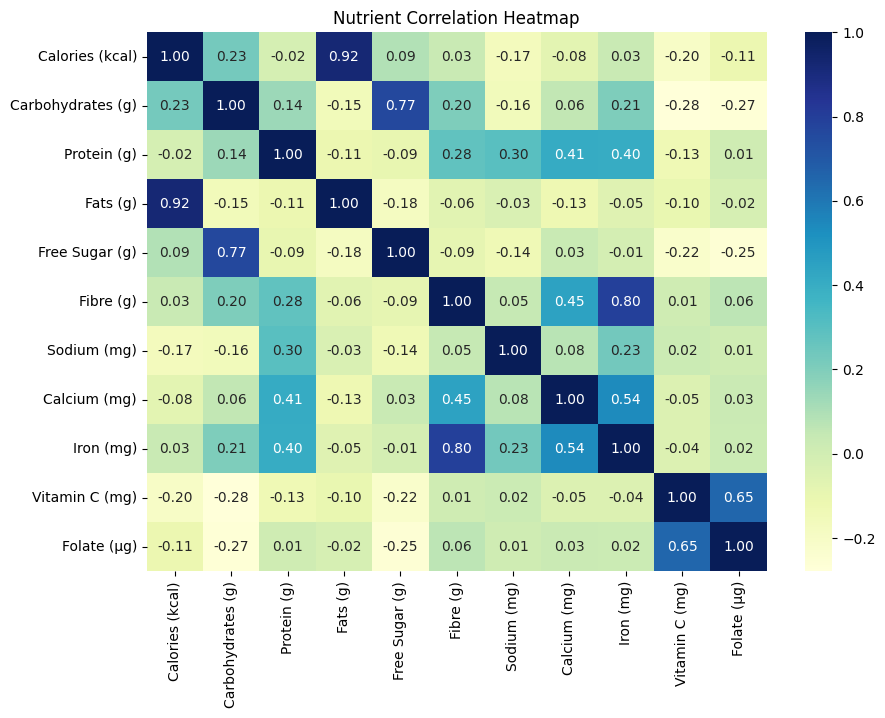

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Nutrient Correlation Heatmap")
plt.show()

Outlier detection

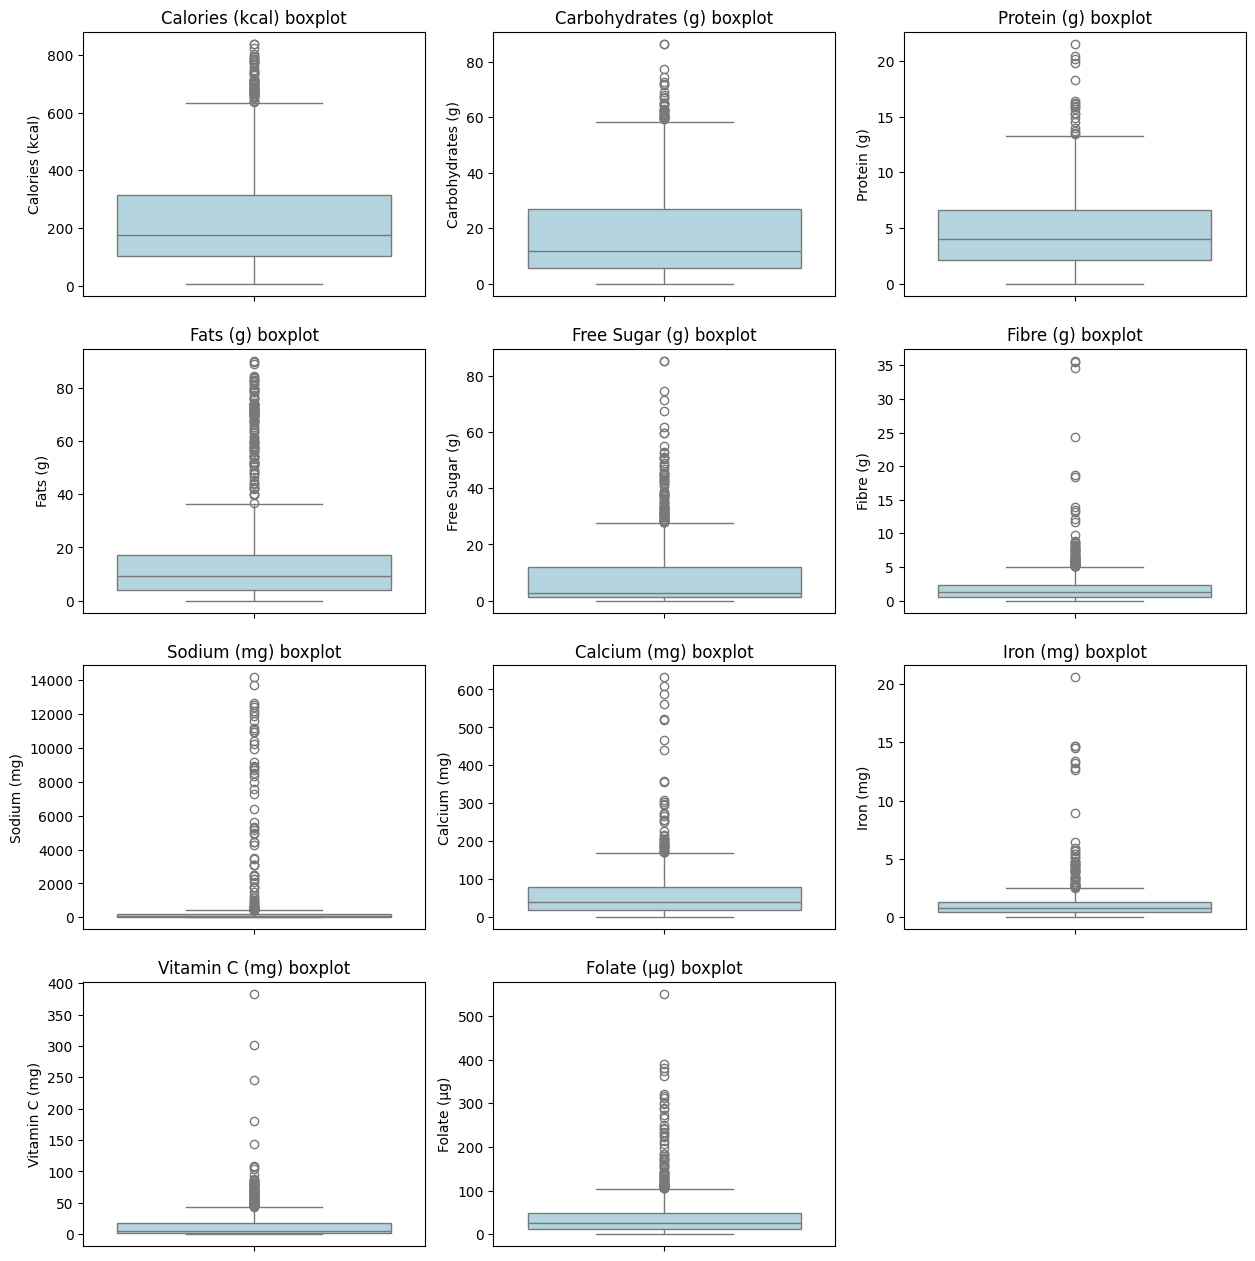

In [27]:
num_plots = len(nutrient_cols)

cols = 3
if num_plots % cols != 0:
    rows += 1

plt.figure(figsize=(5*cols, 4*rows))

i = 1
for col in nutrient_cols:
    plt.subplot(rows, cols, i)
    sns.boxplot(data=nutr_data, y=col, color="lightblue")
    plt.title(f'{col} boxplot')
    i += 1

plt.show()

Q1. What are the most and least calorie dense foods and protein rich foods? (protein column could be interchanged with any other macro/micronutrient to evaluate different nutrients)

In [37]:
most_calories = nutr_data.sort_values(by="Calories (kcal)", ascending=False)
most_cals= most_calories.head(1)
print("Most calorie dense dish: ")
print(most_cals)

least_calories = nutr_data.sort_values(by="Calories (kcal)", ascending=True)
least_cals= least_calories.head(1)
print("Least calorie dense dish:")
print(least_cals)


Most calorie dense dish: 
            Dish Name  Calories (kcal)  Carbohydrates (g)  Protein (g)  \
414  Soyabean muthias           839.33                3.7         2.46   

     Fats (g)  Free Sugar (g)  Fibre (g)  Sodium (mg)  Calcium (mg)  \
414     90.45            0.17       1.47        78.25         12.16   

     Iron (mg)  Vitamin C (mg)  Folate (µg)  
414        0.6            0.79        22.43  
Least calorie dense dish:
    Dish Name  Calories (kcal)  Carbohydrates (g)  Protein (g)  Fats (g)  \
442    Canjee             6.61               0.44         0.24      0.42   

     Free Sugar (g)  Fibre (g)  Sodium (mg)  Calcium (mg)  Iron (mg)  \
442            0.21       0.36        43.03          5.82       0.17   

     Vitamin C (mg)  Folate (µg)  
442            0.52         3.61  


In [39]:
max_protein = nutr_data.sort_values(by="Protein (g)", ascending=False)
max_protein= max_protein.head(10)
print("\nTop 10 High-Protein Dishes:")
print(max_protein[["Dish Name", "Protein (g)", "Calories (kcal)", "Carbohydrates (g)", "Fats (g)"]])


Top 10 High-Protein Dishes:
                                              Dish Name  Protein (g)  \
683                                  Gun powder chutney        21.55   
539                                       Roast chicken        20.49   
849                                       Lemon chicken        20.20   
930                                   Maa chaane ki dal        19.80   
1013                Bengal 5 Spice Blend (Panch Phoran)        18.26   
850                                   Lemon butter fish        16.38   
222                                    Tandoori chicken        16.26   
551                                  Baked stuffed fish        16.14   
232                                          Fish tikka        16.00   
956   Cracked wheat and green gram dal premix (Dalia...        15.89   

      Calories (kcal)  Carbohydrates (g)  Fats (g)  
683            312.34              47.65      2.67  
539            199.90               0.10     13.06  
849            169.

Q2. What is the macronutrient distribution of a food?

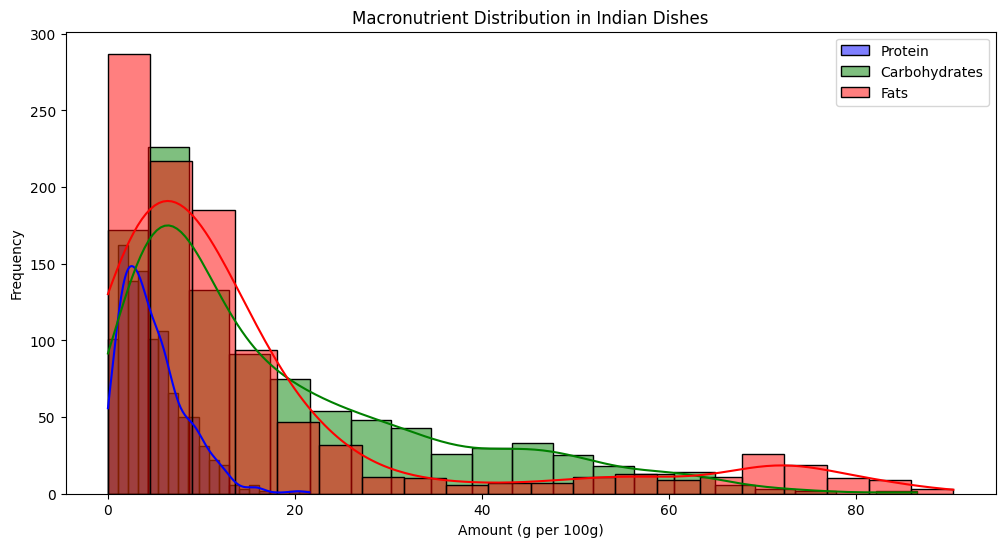

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(nutr_data["Protein (g)"], bins=20, kde=True, color="blue", label="Protein")
sns.histplot(nutr_data["Carbohydrates (g)"], bins=20, kde=True, color="green", label="Carbohydrates")
sns.histplot(nutr_data["Fats (g)"], bins=20, kde=True, color="red", label="Fats")
plt.legend()
plt.title("Macronutrient Distribution in Indian Dishes")
plt.xlabel("Amount (g per 100g)")
plt.ylabel("Frequency")
plt.show()

Q3. What is the micronutrient distribution of a food?

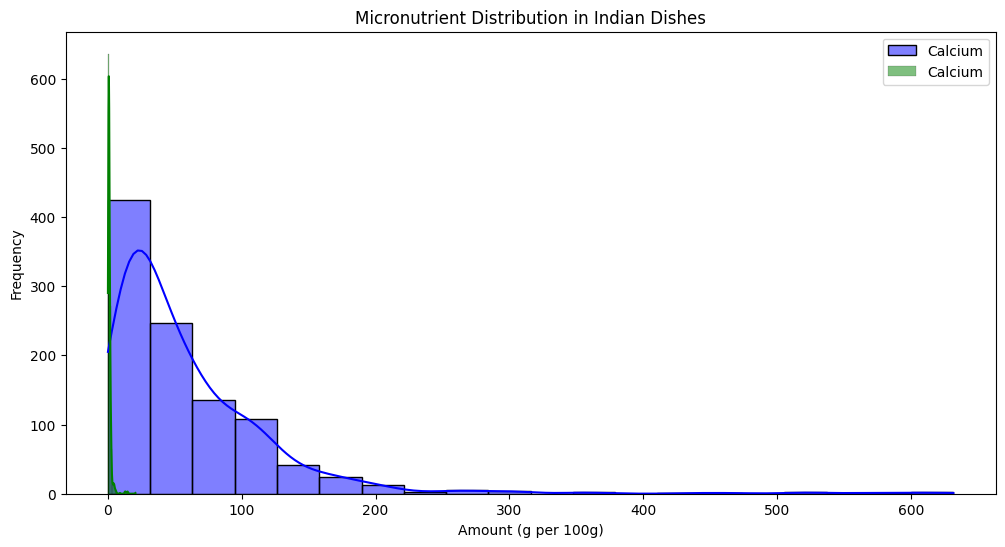

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(nutr_data["Calcium (mg)"], bins=20, kde=True, color="blue", label="Calcium")
sns.histplot(nutr_data["Iron (mg)"], bins=20, kde=True, color="green", label="Calcium")
plt.legend()
plt.title("Micronutrient Distribution in Indian Dishes")
plt.xlabel("Amount (g per 100g)")
plt.ylabel("Frequency")
plt.show()


Q4. Is there a correlation between high protein and high calorie foods?

Q5. What dishes meet recommended daily values in a specific category? (recommended nutritional goals listed below):<br>
- Rec protein value: 10-35% of caloric intake <br>
- Rec carbs value: 130g <br>
- Rec fats: 20-35% of caloric intake <br>
- Rec sugar: <10% of caloric intake or 25g <br>
- Rec fibre: 25-30g <br>
- Rec sodium: 5g <br>
- Rec calcium: 600mg <br>
- Rec iron: 8-27mg <br>

Q6. Which nutrients are strongly correlated with calorie content in Indian dishes? <br>

Q7. Protein VS Calorie distribution

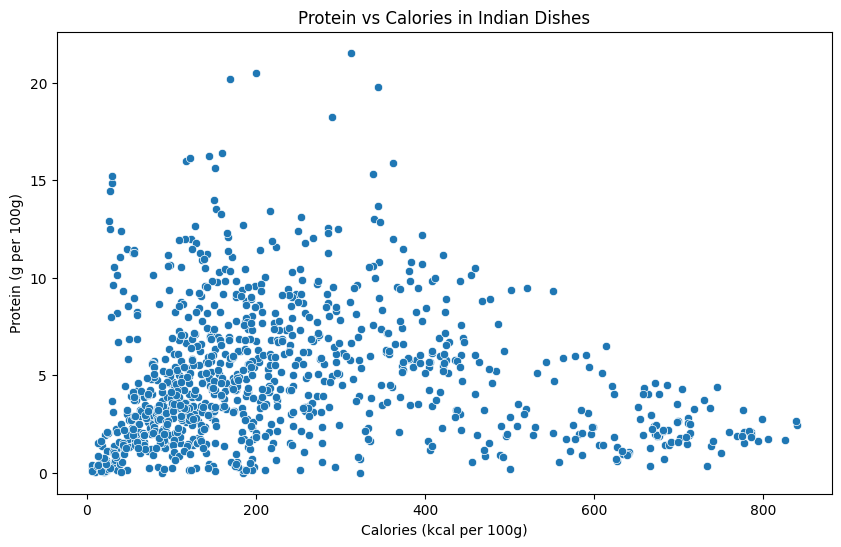

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nutr_data["Calories (kcal)"], y=nutr_data["Protein (g)"])
plt.title("Protein vs Calories in Indian Dishes")
plt.xlabel("Calories (kcal per 100g)")
plt.ylabel("Protein (g per 100g)")
plt.show()